# Mall_Customers Segmentation Analysis

Customer Segmentation Analysis
with Python

Customer segmentation is useful in understanding what demographic and psychographic sub-populations there are within your customers in a business case.


# Importing required libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Internsavy\task_3\Mall_Customers.csv")

In [3]:
df=data.copy()

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Data consists of 200 datapoints distributed to 5 features


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data has 0 null values and datatypes as Gender with object type and rest with int

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The above describes the average age as 38, average income as 60.560000(k$) , 

average spending score(1-100) as 50.200000 

the maximum age is 70 , income is 137.000000(k$) , spending score is 99.000000

# Exploring the dataset

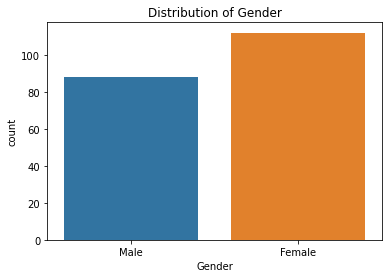

In [12]:
sns.countplot(x='Gender', data=df);
plt.title('Distribution of Gender');

This helps in recognising different distributions .There are more women than men in this data.


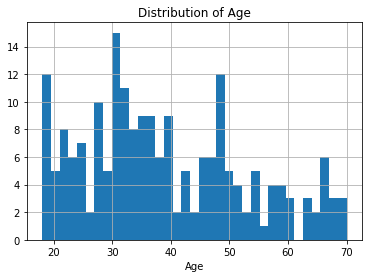

In [14]:
df.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

Text(0.5, 0, 'Age')

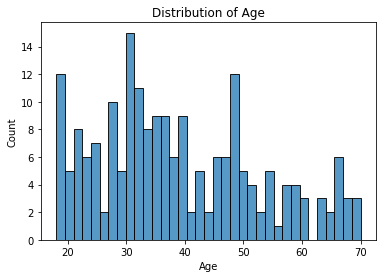

In [18]:
sns.histplot(df['Age'],bins=35)
plt.title("Distribution of Age')
plt.xlabel('Age')

From the above plot the ages are mostly between 30 and 40.  The average age was 36. 
There are less older customers, so this distribution is right-skewed because of its longer right tail. 




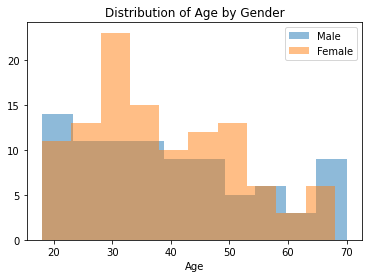

In [31]:
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

The above plot shows that the men in this data set are more likely to be younger than the women. 
There are also more middle-aged women in this data set than men.


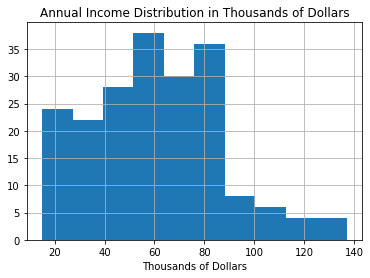

In [24]:
df.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

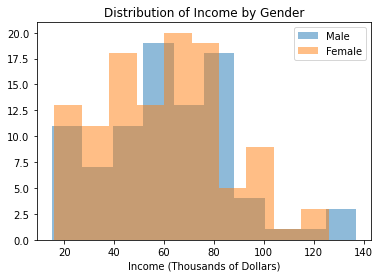

In [25]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

The women in this data set make less money than the men

In [26]:
male_customers = df[df['Gender'] == 'Male']
female_customers = df[df['Gender'] == 'Female']

# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


In [27]:
# Created data sets by gender to save time in the future since gender seems to significantly impact other variables
male_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
...,...,...,...,...,...
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
female_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


Text(0.5, 1.0, 'Correlation Heatmap - Female')

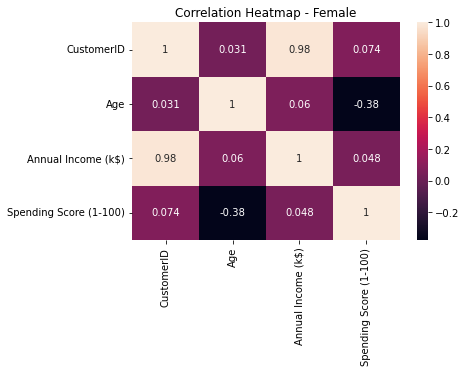

In [32]:
sns.heatmap(female_customers.corr(), annot=True)
plt.title('Correlation Heatmap - Female')

Text(0.5, 1.0, 'Correlation Heatmap - Male')

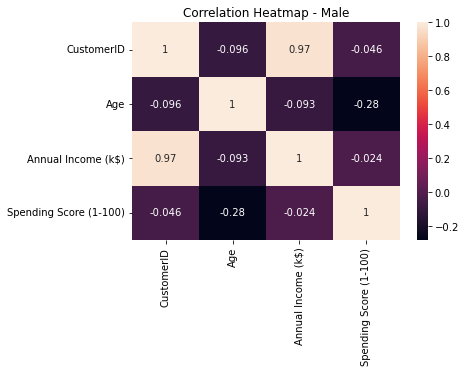

In [33]:
sns.heatmap(male_customers.corr(), annot=True)
plt.title('Correlation Heatmap - Male')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


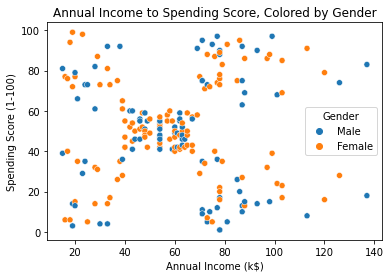

In [37]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=df);
plt.title('Annual Income to Spending Score, Colored by Gender');

Here in the above pattern we can see segments .

low income-low spending score , high income-high spending area , mid income-high spending area